**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Input**

In [ ]:
import pandas as pd
import os
print(os.getcwd())

# Load the dataset
#df = pd.read_csv(file_path)
df = pd.read_csv('/content/drive/MyDrive/ML/Machine-Learning-Landslide-Prediction-main/Landslide_dataset.csv')
df.head()


/content


,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


**Data Analysis/Cleaning**

In [ ]:
# Check for missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


**Specify the target variable and features;X= Independent variable;y= Dependent variable**



In [ ]:
#Specify the target variable
target_column = 'Landslide'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Specify your features and target
X = df.drop(columns=[target_column])
y = df[target_column]


**Target variable (y): The Landslide column is encoded as numeric values (0 or 1);Features (X): The columns Earthquake, Flow, and Slope are categorical features**

In [ ]:
#Specify the target variable
from sklearn.preprocessing import LabelEncoder
target_column = 'Landslide'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Specify your features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode categorical variables
label_encoder = LabelEncoder()
columns_to_encode = ['Earthquake', 'Flow', 'Slope']
for column in columns_to_encode:
    X[column] = label_encoder.fit_transform(X[column].astype(str))




**The training set gets 80% of the data, and the test set gets 20%.[from random data]**

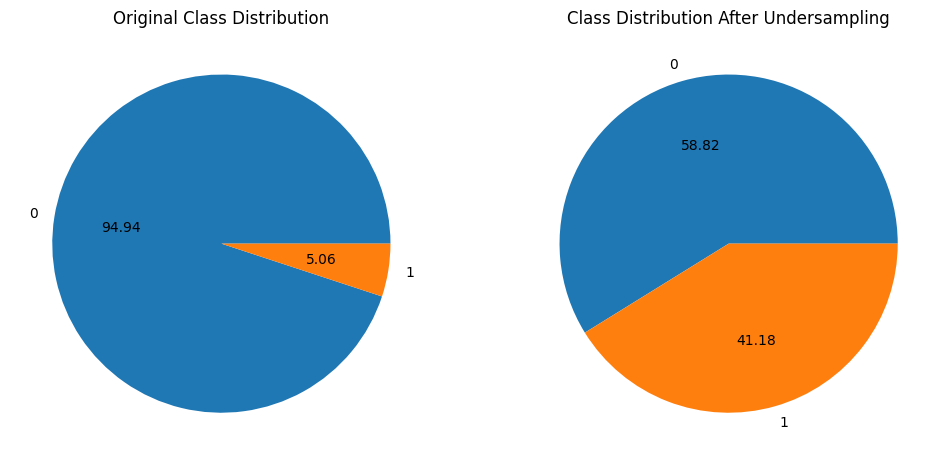

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#Separate features and target variable
# Separate features and target variable
X = df.drop('Landslide', axis=1)
y = df['Landslide']

# Create a subplot with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the original class distribution
axes[0].pie(y.value_counts(), autopct='%.2f', labels=y.value_counts().index)
axes[0].set_title('Original Class Distribution')

# Applying RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.7)
X_res, y_res = rus.fit_resample(X, y)

# Plotting the class distribution after undersampling
ax = axes[1].pie(y_res.value_counts(), autopct='%.2f', labels=y_res.value_counts().index)
axes[1].set_title('Class Distribution After Undersampling')

plt.show()
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

**Initialize and Train the SVM model**

In [ ]:
svm_model = SVC(kernel="linear")

# Fit the SVM model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

***Cross-validation using SVM; Plotting training details for SVM; Computes the confusion matrix, showing how many predictions were true positives, true negatives, false positives, and false negatives. ***

Support Vector Machine (SVM) Scores:
[0.99067164 0.98880299 0.99066915 0.98960277 0.99120235]
Mean SVM Score: 0.9901897802377079


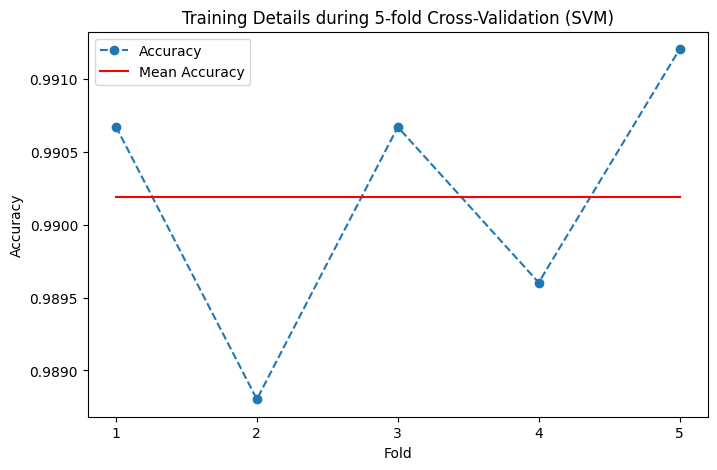

Support Vector Machine (SVM) Accuracy: 0.9908296011942845
Confusion Matrix (SVM):
[[2720   27]
 [  16 1926]]
SVM Precision: 0.9861751152073732
SVM Recall: 0.9917610710607621
SVM F1-score: 0.9889602053915275
SVM Accuracy: 0.9908296011942845
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2747
           1       0.99      0.99      0.99      1942

    accuracy                           0.99      4689
   macro avg       0.99      0.99      0.99      4689
weighted avg       0.99      0.99      0.99      4689



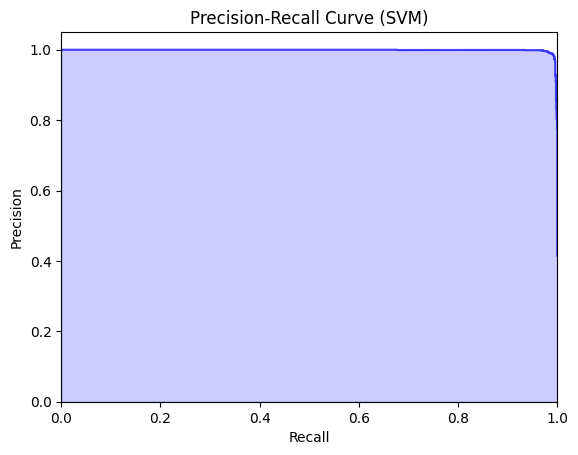

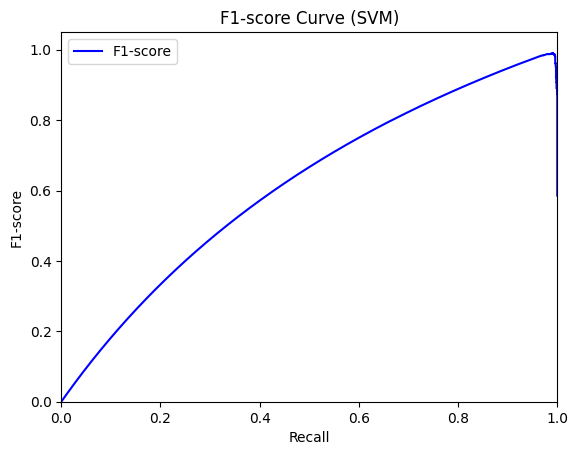

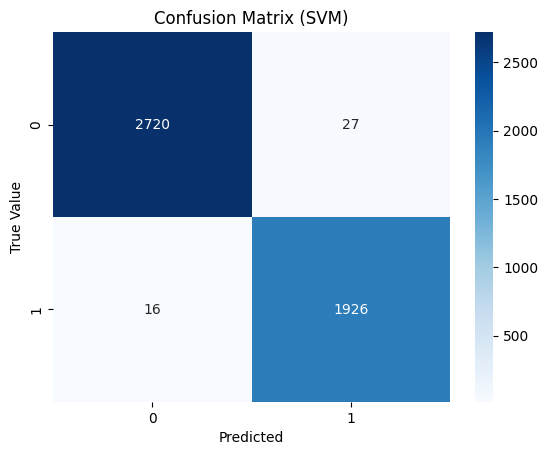

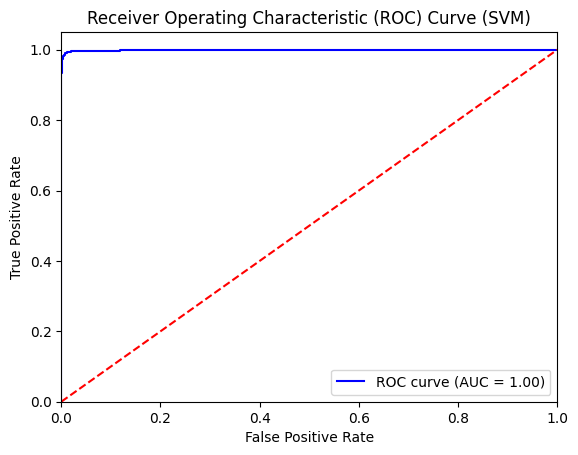

In [ ]:
from sklearn.model_selection import cross_val_score

# Add Support Vector Machine (SVM) model
# Cross-validate SVM model
svm_scores = cross_val_score(estimator=svm_model, X=X_train, y=y_train, cv=5)
svm_mean_score = np.mean(svm_scores)

print("Support Vector Machine (SVM) Scores:")
print(svm_scores)
print("Mean SVM Score:", svm_mean_score)

# Plot training details for SVM
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), svm_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [svm_mean_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation (SVM)')
plt.legend()
plt.show()

# Evaluate SVM model on the test set
svm_model_score = svm_model.score(X_test, y_test)
print("Support Vector Machine (SVM) Accuracy:", svm_model_score)

# Confusion matrix for SVM
svm_y_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix (SVM):")
print(svm_cm)

# Evaluate additional metrics for SVM
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM Accuracy:", svm_accuracy)

# Classification report for SVM
svm_class_report = classification_report(y_test, svm_y_pred)
print("Classification Report (SVM):")
print(svm_class_report)

# Plot Precision-Recall curve for SVM
svm_y_pred_probs = svm_model.decision_function(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_y_pred_probs)

plt.step(svm_recall, svm_precision, color='b', alpha=0.7, where='post')
plt.fill_between(svm_recall, svm_precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve for SVM
svm_f1_values = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)
plt.plot(svm_recall, svm_f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (SVM)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_y_pred)

# Create a heatmap for the confusion matrix (SVM)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Calculate ROC curve and AUC for SVM
svm_y_pred_probs = svm_model.decision_function(X_test)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve for SVM
plt.plot(svm_fpr, svm_tpr, color='b', label='ROC curve (AUC = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()